#simple linear regression

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

Step1-Data Ingestion(Read the dataset)

In [2]:
import pandas as pd

df = pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Visulize the data using pairplot

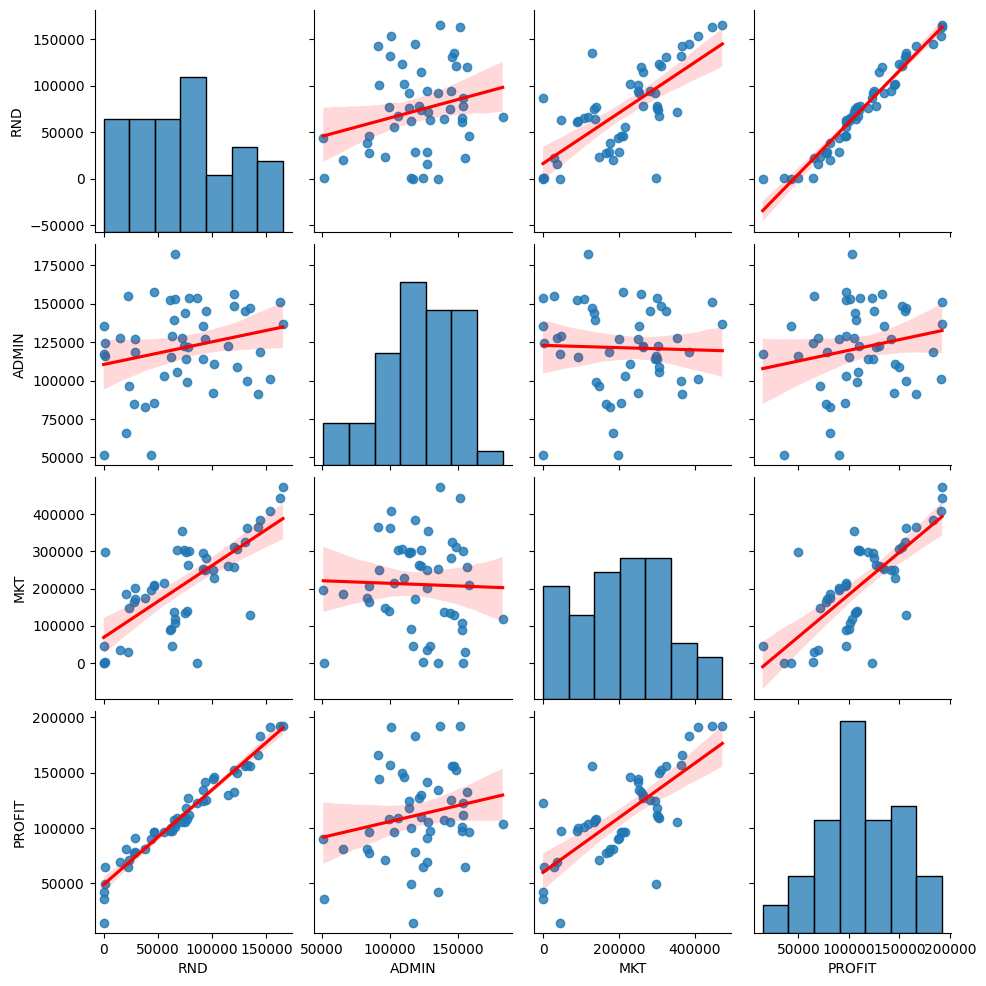

In [10]:
import seaborn as sns

sns.pairplot(df, kind="reg", plot_kws={"line_kws": {"color": "red"}})

<Axes: xlabel='RND', ylabel='PROFIT'>

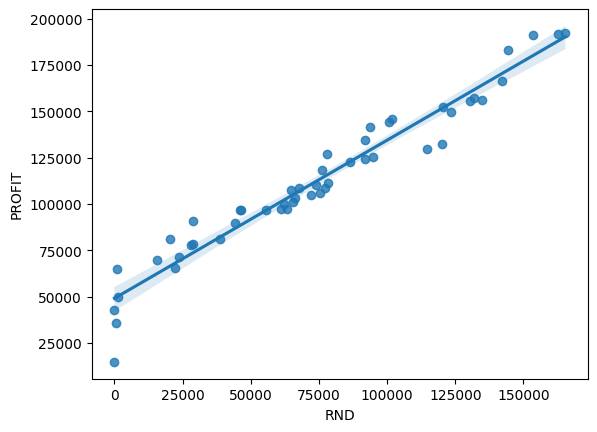

In [14]:
sns.regplot(data=df, x="RND", y="PROFIT")

In [15]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


##problem statement:Predict profit based on RND
1.profit~RND means profit is dependant on RND 
2.PROFIT is target and RND in predictor 
3.PROFIT_pred=B0+B1*RND

STEP2:Perform basic quality data checks :

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [17]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

#check Duplicate Values:

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
##This is shows that there are no missing values or duplicates in the dataset.

In [ ]:
###STEP 3:SEPARATE X(PREDICTOR) AND Y(FEATURES AND TARGET VARIABLE)

In [22]:
X = [["RND"]]
Y = [["PROFIT"]]

In [23]:
##step 4:cREATE LINEAR REGRESSION MODEL

In [24]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()
model.fit(df[["RND"]], df[["PROFIT"]])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
model.intercept_

array([49032.89914125])

In [28]:
model.coef_

array([[0.85429137]])

##PROFIT_pred=49032.899+0.854*df["RND"]
##IF RND increase by 1 USD the PROFIT will increase by 0.8543 

In [29]:
# STEP5:Model Evaluation:

In [31]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_squared_log_error,
    median_absolute_error,
)

In [32]:
ypred = model.predict(df[["RND"]])
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [33]:
def evaluate_model(y_true, y_pred):
    print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error:", mean_squared_error(y_true, y_pred, squared=False))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("Mean Squared Log Error:", mean_squared_log_error(y_true, y_pred))
    print("Median Absolute Error:", median_absolute_error(y_true, y_pred))

In [34]:
print(f"RMSE: {mean_squared_error(df[["PROFIT"]], ypred, squared=False)}")
print(f"R2: {r2_score(df[["PROFIT"]], ypred)}")
print(f"MAE: {mean_absolute_error(df[["PROFIT"]], ypred)}")

TypeError: got an unexpected keyword argument 'squared'

In [35]:
evaluate_model(df[["PROFIT"]], ypred)

Mean Absolute Error: 6910.98435457961
Mean Squared Error: 85120931.32706906


TypeError: got an unexpected keyword argument 'squared'

In [36]:
##Out of Model prediction: